# Image processing
1. Histogram Equalization
2. Median Filter
3. Mean Filter
4. Gaussian Smoothing

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1. Histogram Equalization

In [2]:
img = cv2.imread('Unequalized_pic.jpg') # , cv2.IMREAD_GRAYSCALE
assert img is not None, "file could not be read, check with os.path.exists()"
# print("img shape = ", img.shape)

In [3]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
# print("cdf = \n", cdf)

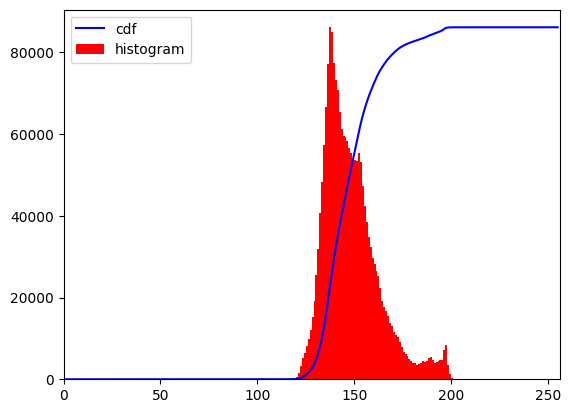

In [4]:
# to illustrate normalized cdf to maximum of histogram
cdf_normalized = cdf * float(hist.max()) / cdf.max()
# print("cdf normalized = \n", cdf_normalized)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [5]:
# cdf is normalized using maxmin.
# to eliminate 0, cdf is masked first
masked_cdf = np.ma.masked_equal(cdf,0)
# print(masked_cdf)
normalized_masked_cdf = (masked_cdf - masked_cdf.min())*255/(masked_cdf.max()-masked_cdf.min())
# print(normalized_masked_cdf)
normalized_cdf = np.ma.filled(normalized_masked_cdf,0).astype('uint8')
# print(normalized_cdf)

In [6]:
img_hist_equalization = normalized_cdf[img]

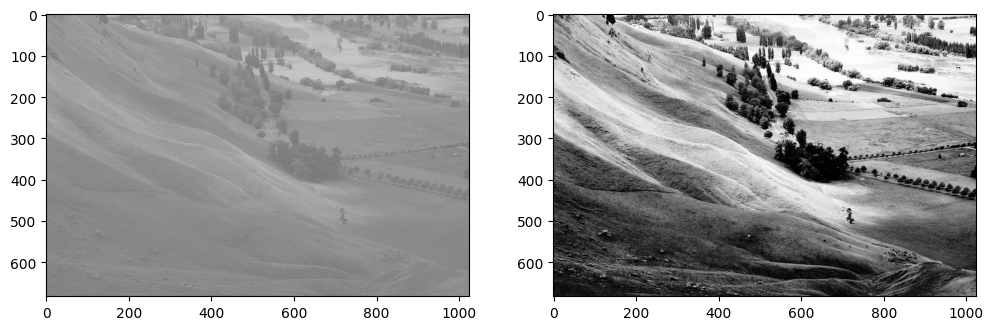

In [8]:
f, axis_array = plt.subplots(1,2, figsize=(12,8))
axis_array[0].imshow(img)
axis_array[1].imshow(img_hist_equalization)

The following image is used for filters

In [9]:
src = cv2.imread('Lady_grayscale_salt_pepper.png') # , cv2.IMREAD_GRAYSCALE # Pic3_eveningParty
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
print(image.shape)

(305, 304)


## 2. Median Filter

In [10]:
def median_filter(image, kernelSize, padding = False):
    # print(image.shape)
    if(padding):
        col_pad = np.zeros([image.shape[0], 1])
        # print(col_pad.shape)
        image = np.concatenate((col_pad, image, col_pad), axis = 1)
        # print(image.shape)
        row_pad = np.zeros([1, image.shape[1]])
        image = np.concatenate((row_pad, image, row_pad), axis = 0)
        # print(image.shape)


    xIn, yIn = np.shape(image)
    xKer, yKer = kernelSize, kernelSize

    xOut = int(xIn - xKer + 1)
    yOut = int(yIn - yKer + 1)

    output = np.zeros((xOut, yOut))

    for y in range(yOut):
      for x in range(xOut):
        output[x, y] = np.median(image[x: x + xKer, y: y + yKer])

    return output.astype('uint8')

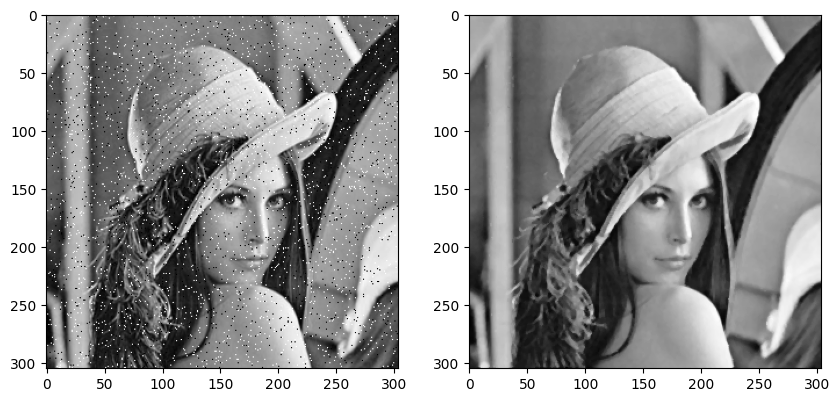

In [11]:
medianFiltered_outImage = median_filter(image, kernelSize = 3, padding = True)
f, axis_array = plt.subplots(1,2, figsize=(10,8))
axis_array[0].imshow(image, cmap = 'gray')
axis_array[1].imshow(medianFiltered_outImage, cmap = 'gray')

## 3. Mean Filter

In [12]:
def mean_filter(image, kernelSize, padding = False):
    print(image.shape)
    if(padding):
        col_pad = np.zeros([image.shape[0], 1])
        # print(col_pad.shape)
        image = np.concatenate((col_pad, image, col_pad), axis = 1)
        # print(image.shape)
        row_pad = np.zeros([1, image.shape[1]])
        image = np.concatenate((row_pad, image, row_pad), axis = 0)
        # print(image.shape)


    xIn, yIn = np.shape(image)
    xKer, yKer = kernelSize, kernelSize

    xOut = int(xIn - xKer + 1)
    yOut = int(yIn - yKer + 1)

    output = np.zeros((xOut, yOut))

    for y in range(yOut):
      for x in range(xOut):
        output[x, y] = np.mean(image[x: x + xKer, y: y + yKer])

    return output.astype('uint8')

(305, 304)


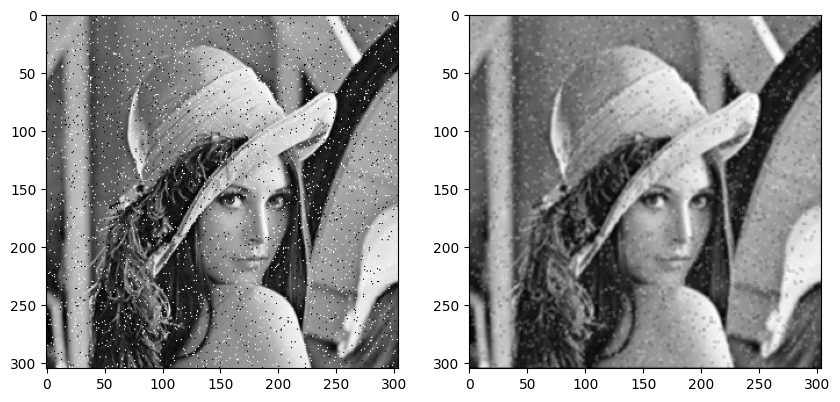

In [13]:
meanFiltered_outImage = mean_filter(image, kernelSize = 3, padding = True)
f, axis_array = plt.subplots(1,2, figsize=(10,8))
axis_array[0].imshow(image, cmap = 'gray')
axis_array[1].imshow(meanFiltered_outImage, cmap = 'gray')

## 4. Gaussian Smoothing

In [14]:
def gaussian(x2, sigma = 1):
    return 1.0/(2*np.pi*sigma*sigma)*np.exp(-x2/(2*sigma*sigma))
    # 1.0/(2*np.pi*sigma*sigma)*np.exp(-(x*x+y*y)/(2*sigma*sigma))

def gkernel_gen(ksize, sigma = 1):
    kernel = np.zeros((ksize, ksize))
    for i in range(-int(ksize/2), int(ksize)-1, 1):
      # print(i)
      for j in range(-int(ksize/2), int(ksize)-1, 1):
        kernel[i+1,j+1] = gaussian(i*i+j*j, sigma)
        # print(i+1,j+1)
    return kernel

gkernel = gkernel_gen(3) * 1.50227216/0.05854983
gkernel

array([[1.5022722 , 2.47682813, 1.5022722 ],
       [2.47682813, 4.08359922, 2.47682813],
       [1.5022722 , 2.47682813, 1.5022722 ]])

In [15]:
def gaussian_filter(image, ksize = 3, sigma = 1, padding = False):
    print(image.shape)
    if(padding):
          col_pad = np.zeros([image.shape[0], 1])
          # print(col_pad.shape)
          image = np.concatenate((col_pad, image, col_pad), axis = 1)
          # print(image.shape)
          row_pad = np.zeros([1, image.shape[1]])
          image = np.concatenate((row_pad, image, row_pad), axis = 0)
          # print(image.shape)

    xIn, yIn = np.shape(image)
    gkernel = gkernel_gen(ksize, sigma)

    xOut = int(xIn - ksize + 1)
    yOut = int(yIn - ksize + 1)

    output = np.zeros((xOut, yOut))

    for y in range(yOut):
        for x in range(xOut):
            output[x, y] = (gkernel * image[x: x + ksize, y: y + ksize]).sum()

    output += 255 - output.max()

    return output.astype('uint8')

(305, 304)


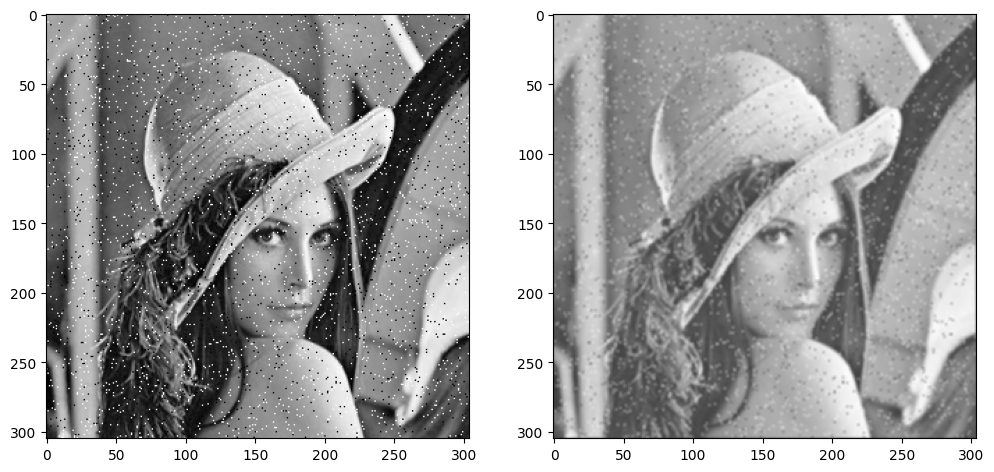

In [16]:
gaussianFiltered_outImage = gaussian_filter(image, padding = True)
f, axis_array = plt.subplots(1,2, figsize=(12,8))
axis_array[0].imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
axis_array[1].imshow(cv2.cvtColor(gaussianFiltered_outImage, cv2.COLOR_GRAY2RGB))